In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/Haji Moinuddin/OneDrive/Desktop/Titanic-Dataset.csv")  # make sure you have the dataset in the same directory

# Basic info
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Check for null values
print(df.isnull().sum())

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many nulls)
df.drop('Cabin', axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\Haji Moinuddin\AppData\Local\Temp\ipykernel_2504\1482321880.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Haji Moinuddin\AppData\Local\Temp\ipykernel_2504\1482321880.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [3]:
# Convert 'Sex' and 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Optionally, encode 'Pclass' as string and one-hot it too
df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass', drop_first=True)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only scale numeric columns (excluding target 'Survived')
numeric_cols = ['Age', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


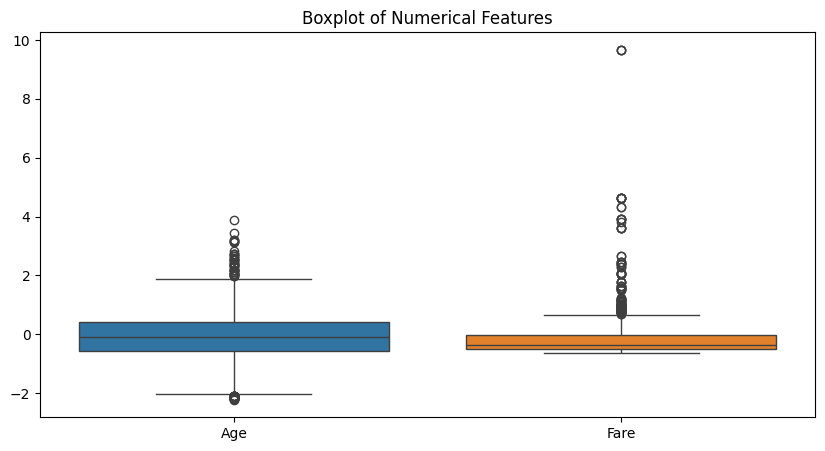

In [5]:
# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numerical Features")
plt.show()

# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [6]:
print(df.head())
print(df.shape)


   PassengerId  Survived                                          Name  \
0            1         0                       Braund, Mr. Owen Harris   
2            3         1                        Heikkinen, Miss. Laina   
3            4         1  Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                      Allen, Mr. William Henry   
5            6         0                              Moran, Mr. James   

        Age  SibSp  Parch            Ticket      Fare  Sex_male  Embarked_Q  \
0 -0.565736      1      0         A/5 21171 -0.502445      True       False   
2 -0.258337      0      0  STON/O2. 3101282 -0.488854     False       False   
3  0.433312      1      0            113803  0.420730     False       False   
4  0.433312      0      0            373450 -0.486337      True       False   
5 -0.104637      0      0            330877 -0.478116      True        True   

   Embarked_S  Pclass_2  Pclass_3  
0        True     False      True  
2       